<a href="https://colab.research.google.com/github/scholarmaverick1991/COVID-19/blob/master/Data_Manager_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#libraries
import pandas as pd
import seaborn as sns
#loading dataset
df = pd.read_excel('/content/drive/MyDrive/PharmaWorld.xlsx', sheet_name=None)
df.keys()

dict_keys(['Sales', 'Product', 'Doctors', 'Territory', 'Months', 'MF'])

# 1. What is the Revenue for all Products, Territories, Doctors for Quarter 1 in 2021?

In [3]:
# Filtering 2022
Sales = df['Sales']
rev_2021 = Sales[Sales['Year']==2021]

Theres 17 products sold across 3 markets, which are spread over 77 territories with 5 regions and 48 states.

## Revenue by Product

In [5]:
#Grouping by Sales data by Product
Revenue_df = pd.merge(rev_2021,df['Product'], on = 'Product Code').groupby(['Product']).sum().sort_values('Revenue').reset_index()
Revenue_df[['Product', 'Revenue']]

,Product,Revenue
0,Deepax,167416.7
1,Glyzet,261406.2
2,Tridor,281563.7
3,Meltormin,618388.1
4,Effiend,713906.6
5,Avacro,770573.1
6,Trilitix,802826.2
7,Acardose,973051.2
8,Atacant,1230060.7
9,Tolazatide,1318376.4


<Axes: xlabel='Revenue', ylabel='Product'>

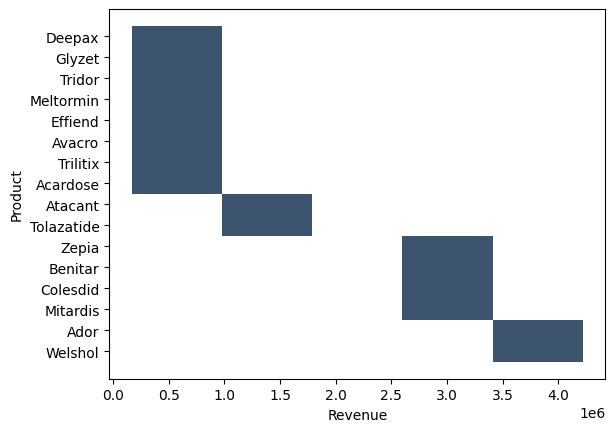

In [4]:
#Plotting the Data
sns.histplot(Revenue_df, y = 'Product', x = 'Revenue')

These are the products order by revenue in asending order

## Revenue by Doctor

In [6]:
# Combining the tables
dr_rev = pd.merge(rev_2021,df['Doctors'], on = 'DoctorID').groupby('Doctor').sum().sort_values('Revenue').reset_index()
dr_rev[['Doctor','Revenue']]

,Doctor,Revenue
0,Echeverri Ana Patricia,15032.6
1,Seligman-Haas Susan Beth,20780.1
2,Stein Neil H,21577.6
3,Phaneuf Katherine L,23444.3
4,Whelan Janet Roberta,23921.7
...,...,...
571,Goldberg Harvey L,93077.6
572,Cameron Walter Francis,100162.7
573,Carney Nancy Draper,100861.2
574,Manvar Dolly B,121702.9


<Axes: xlabel='Revenue', ylabel='Doctor'>

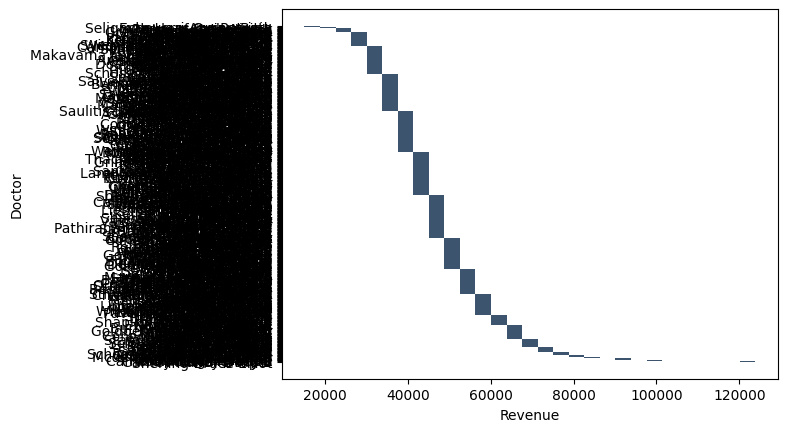

In [7]:
sns.histplot(dr_rev, y = 'Doctor', x = 'Revenue')

## Revenue by Territories

In [76]:
terr = pd.merge(df['Territory'],df['Doctors'], on = 'Territory')

rev_terr = pd.merge(df['Sales'],terr, on = 'DoctorID')
terr_df = rev_terr.groupby('Territory').sum().reset_index()
terr_df[['Territory','Revenue']]


,Territory,Revenue
0,01BD0101,887880.9
1,01BD0102,592800.3
2,01BD0103,586442.8
3,01BD0104,980135.7
4,01BD0105,982262.8
...,...,...
61,01BD0802,1164965.9
62,01BD0803,552677.4
63,01BD0804,362621.2
64,01BD0805,504945.6


These are Top and botton 5 grossing Doctors in the dataset

# 2. Top 5 Products for 2020 & 2021

In [77]:
#Produts for 2021
Sales = pd.merge(df['Sales'],df['Product'], on = ['Product Code'])
top5_pro21 =Sales[sales['Year']==2021]
top5_pro21[['Product','Revenue']].groupby(['Product']).sum().sort_values('Revenue', ascending = False).head(5)

,Revenue
Product,
Welshol,3987011.3
Ador,3524967.2
Mitardis,3166853.4
Colesdid,2843016.2
Benitar,2563976.7


In [71]:
# Products for 2020
top5_pro20 =Sales[Sales['Year']==2020]
top5_pro20[['Product','Revenue']].groupby(['Product']).sum().sort_values('Revenue',ascending = False).head(5)

,Revenue
Product,
Welshol,3473747.0
Ador,3090067.0
Mitardis,2922632.0
Benitar,2471370.0
Colesdid,2439103.0


#3. Top 3 Highest grossing Territories

In [70]:
# Step 1: Load the data
df = pd.read_excel('/content/drive/MyDrive/PharmaWorld.xlsx', sheet_name =None)
sales_df = df['Sales']
doctors_df = df['Doctors']

# Step 2: Merge the data to include territory information in sales
sales_with_territory = pd.merge(sales_df, doctors_df[['DoctorID', 'Territory']], on='DoctorID', how='left')

# Step 3: Aggregate sales data by territory and year
sales_agg = sales_with_territory.groupby(['Territory', 'Year'])['Revenue'].sum().reset_index()

# Step 4: Pivot the data for easier year-on-year calculation
sales_pivot = sales_agg.pivot(index='Territory', columns='Year', values='Revenue').reset_index()

# Calculate year-on-year growth assuming the years are 2020 and 2021 for this example
sales_pivot['YoY Growth'] = ((sales_pivot[2021] - sales_pivot[2020]) / sales_pivot[2020])*100

# Step 5: Identify the top three territories with highest growth
top_territories = sales_pivot.sort_values(by='YoY Growth', ascending=False).head(3)

top_territories[['Territory', 'YoY Growth']]


Year,Territory,YoY Growth
11,01BD0203,110.024264
16,01BD0208,59.608978
44,01BD0602,51.394298


# 4. 5 Doctors with highest profit in the 3 Territories

In [69]:

# Filter the sales data for 2021 and the specified territories
top_territories = ['01BD0203', '01BD0208', '01BD0602']
sales_2021 = rev_terr[rev_terr['Year'] == 2021]
sales_2021_top_territories = sales_2021[sales_2021['Territory'].isin(top_territories)]

# Calculate profit for each sale
sales_2021_top_territories['Profit'] = sales_2021_top_territories['Revenue'] - sales_2021_top_territories['Cost of Sales']

# Aggregate profit by DoctorID for each territory
profit_by_doctor = sales_2021_top_territories.groupby(['DoctorID', 'Territory'])['Profit'].sum().reset_index()

# Identify the doctor with the highest profit in each territory
top_doctors = profit_by_doctor.loc[profit_by_doctor.groupby('Territory')['Profit'].idxmax()]

# Join with the doctors dataframe to get the names of the doctors
top_doctors_with_names = pd.merge(top_doctors, doctors_df[['DoctorID', 'Doctor']], on='DoctorID', how='left')

top_doctors_with_names[['Territory', 'Doctor', 'Profit']]


<ipython-input-69-7d1475b0b3de>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2021_top_territories['Profit'] = sales_2021_top_territories['Revenue'] - sales_2021_top_territories['Cost of Sales']


,Territory,Doctor,Profit
0,01BD0203,Goldberg Harvey L,24709.916
1,01BD0208,Baily Dennis,13772.484
2,01BD0602,Buggeln Craig R,23232.176


#5. Trending products which the most doward prescription trend

In [78]:
# Determine the last month and start of the last 6-month period
last_month = sales_df['Year-Month'].max()
start_of_period = last_month - 5

# Filter sales data for the last 6 months
last_6_months_sales = sales_df[(sales_df['Year-Month'] <= last_month) & (sales_df['Year-Month'] >= start_of_period)]

# Aggregate prescription counts by product code
prescriptions_agg = last_6_months_sales.groupby('Product Code')['Prescriptions'].sum().reset_index()

# Calculate prescriptions in the first and last month of the period
prescriptions_start = last_6_months_sales[last_6_months_sales['Year-Month'] == start_of_period].groupby('Product Code')['Prescriptions'].sum().reset_index().rename(columns={'Prescriptions': 'Start_Prescriptions'})
prescriptions_end = last_6_months_sales[last_6_months_sales['Year-Month'] == last_month].groupby('Product Code')['Prescriptions'].sum().reset_index().rename(columns={'Prescriptions': 'End_Prescriptions'})

# Merge to get the trend for each product
trend_data = pd.merge(prescriptions_agg, prescriptions_start, on='Product Code', how='left')
trend_data = pd.merge(trend_data, prescriptions_end, on='Product Code', how='left')

# Calculate the trend (difference between the end and start of the period)
trend_data['Trend'] = trend_data['End_Prescriptions'] - trend_data['Start_Prescriptions']

# Find the top 3 products with the most significant downtrend
top_downtrend_products = trend_data.sort_values(by='Trend').head(3)

top_downtrend_products[['Product Code', 'Trend']]


,Product Code,Trend
34,193903,-68
12,193831,-24
18,193859,-24
